## Assignment2

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_run = 10

df = pd.read_csv("HW1_result_test3.csv")
df

,Function,Run,Filter,Thread,Time
0,serialDataFirst,0,1,1,0.161736
1,serialFilterFirst,0,1,1,0.122817
2,serialDataFirst,0,2,1,0.176156
3,serialFilterFirst,0,2,1,0.129258
4,serialDataFirst,0,4,1,0.327280
...,...,...,...,...,...
315,parallelFilterFirst,9,256,16,2.140485
316,parallelDataFirstUnrolledFilter,9,256,8,2.597628
317,parallelFilterFirstUnrolledFilter,9,256,8,3.040670
318,parallelDataFirstUnrolledData,9,256,8,3.366621


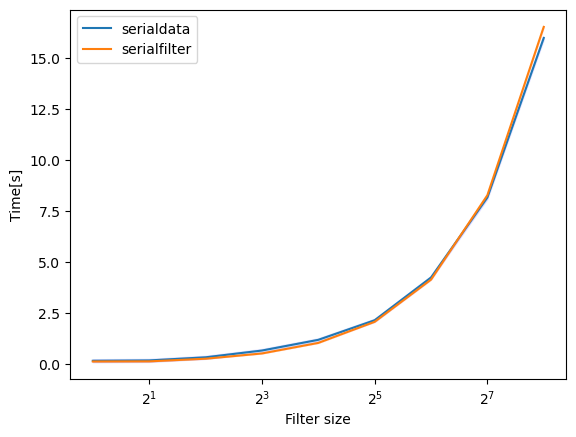

In [35]:
filter = [1,2,4,8,16,32,64,128,256]

serialdata = np.zeros([len(filter),num_run])
serialfilter = np.zeros([len(filter), num_run])

for i in range(num_run):
    for j in range(len(filter)):
        serialdata[j, i] = df.values[32*i + 2*j, 4]
        serialfilter[j, i] = df.values[32*i + 2*j + 1, 4]

# print(serialdata)
# print(serialfilter)

# Plot
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)

ax.plot(filter, serialdata.mean(axis=1))
ax.plot(filter, serialfilter.mean(axis=1))

# Plot the confidence interval for serial data
ci = 0.1 * np.std(serialdata.std(axis=1)) / np.mean(serialdata.std(axis=1))
ax.fill_between(filter, (serialdata.mean(axis=1)-ci), (serialdata.mean(axis=1)+ci), color='blue', alpha=0.1)

# Plot the confidence interval for serial filter
ci = 0.1 * np.std(serialfilter.std(axis=1)) / np.mean(serialfilter.std(axis=1))
ax.fill_between(filter, (serialfilter.mean(axis=1)-serialfilter.std(axis=1)), (serialfilter.mean(axis=1)+serialfilter.std(axis=1)), color='red', alpha=0.1)

ax.set_xlabel("Filter size")
ax.set_ylabel("Time[s]")
ax.legend(["serialdata", "serialfilter"])
plt.show()

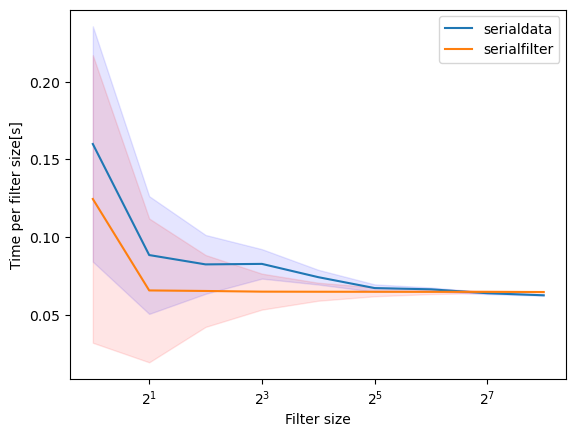

In [36]:
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
ax.plot(filter, serialdata.mean(axis=1)/filter)
ax.plot(filter, serialfilter.mean(axis=1)/filter)

# Plot the confidence interval
ci = 0.1 * np.std(serialdata.std(axis=1)) / np.mean(serialdata.std(axis=1))

ax.fill_between(filter, (serialdata.mean(axis=1)-ci)/filter, (serialdata.mean(axis=1)+ci)/filter, color='blue', alpha=0.1)

# Plot the confidence interval
ci = 0.1 * np.std(serialfilter.std(axis=1)) / np.mean(serialfilter.std(axis=1))
ax.fill_between(filter, (serialfilter.mean(axis=1)-ci)/filter, (serialfilter.mean(axis=1)+ci)/filter, color='red', alpha=0.1)
ax.set_xlabel("Filter size")
ax.set_ylabel("Time per filter size[s]")
ax.legend(["serialdata", "serialfilter"])

plt.show()

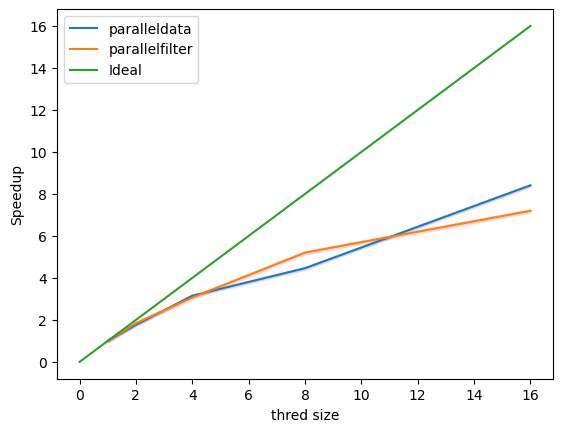

In [42]:
thread = [1,2,4,8,16]

paralleldata = np.zeros([len(thread),num_run])
parallelfilter = np.zeros([len(thread), num_run])

for i in range(num_run):
    for j in range(len(thread)):
        paralleldata[j, i] = df.values[32*i + 18 +2*j, 4]
        parallelfilter[j, i] = df.values[32*i + 18 +2*j + 1, 4]
        
# print(paralleldata)
# print(parallelfilter)
speedup_data = np.zeros([len(thread),num_run])
speedup_filter = np.zeros([len(thread),num_run])

for j in range(len(thread)):
    speedup_data[j] = paralleldata[0]/paralleldata[j]
    speedup_filter[j] = parallelfilter[0]/parallelfilter[j]


# Plot
fig, ax = plt.subplots()
# ax.set_xscale('log', base=2)
# ax.plot(thread, paralleldata.mean(axis=1)[0]/paralleldata.mean(axis=1))
# ax.plot(thread, parallelfilter.mean(axis=1)[0]/parallelfilter.mean(axis=1))

ax.plot(thread, speedup_data.mean(axis=1))
ax.plot(thread, speedup_filter.mean(axis=1))
ax.plot(np.arange(0,17), np.arange(0,17))

# Plot the confidence interval
ci = 0.1 * np.std(speedup_data.std(axis=1)) / np.mean(speedup_data.std(axis=1))
ax.fill_between(thread, (speedup_data.mean(axis=1)-ci), (speedup_data.mean(axis=1)+ci), color='blue', alpha=0.1)

# Plot the confidence interval
ci = 0.1 * np.std(speedup_filter.std(axis=1)) / np.mean(speedup_filter.std(axis=1))
ax.fill_between(thread, (speedup_filter.mean(axis=1)-ci), (speedup_filter.mean(axis=1)+ci), color='red', alpha=0.1)

ax.set_xlabel("thred size")
ax.set_ylabel("Speedup")
ax.legend(["paralleldata", "parallelfilter", "Ideal"])

plt.show()

In [38]:
paralleldataUnrollfilter = np.zeros([num_run])
parallelfilterUnrollfilter = np.zeros([num_run])
paralleldataUnrolldata = np.zeros([num_run])
parallelfilterUnrolldata = np.zeros([num_run])

for i in range(10):
    paralleldataUnrollfilter[i] = df.values[32*i + 28, 4]
    parallelfilterUnrollfilter[i] = df.values[32*i + 29, 4]
    paralleldataUnrolldata[i] = df.values[32*i + 30, 4]
    parallelfilterUnrolldata[i] = df.values[32*i + 31, 4]

values = [[paralleldataUnrollfilter.mean(), parallelfilterUnrollfilter.mean(),paralleldataUnrolldata.mean(),parallelfilterUnrolldata.mean()],
         [paralleldataUnrollfilter.std(), parallelfilterUnrollfilter.std(),paralleldataUnrolldata.std(),parallelfilterUnrolldata.std()]]
result = pd.DataFrame(values, columns=["paralleldataUnrollfilter", "parallelfilterUnrollfilter","paralleldataUnrolldata","parallelfilterUnrolldata"], 
                  index=["Mean Time[s]: ", "Std Time[s]: "])
result

,paralleldataUnrollfilter,parallelfilterUnrollfilter,paralleldataUnrolldata,parallelfilterUnrolldata
Mean Time[s]:,2.314091,3.045312,3.607332,2.192670
Std Time[s]:,0.225165,0.316657,0.286368,0.142132
